In [1]:
## Figure 10 - Temporao Coherence Improvement after proper configuration of network inversion.

import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp
from pysar.simulation.plot import *

work_dir = '~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

# read data
min_coherence = 0.7
metadata = readfile.read_attribute('../velocity.h5')
ref_y, ref_x = int(metadata['REF_Y']), int(metadata['REF_X'])
tcoh = []
tcoh.append(readfile.read('temporalCoherence_allNet_noWeight.h5')[0])
tcoh.append(readfile.read('temporalCoherence_cohNet_varWeight.h5')[0])
tcmask = [tc >= min_coherence for tc in tcoh]

dem = readfile.read('../INPUTS/geometryRadar.h5', datasetName='height')[0]
water_mask = dem > 0.5

Go to directory: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/NET_INV


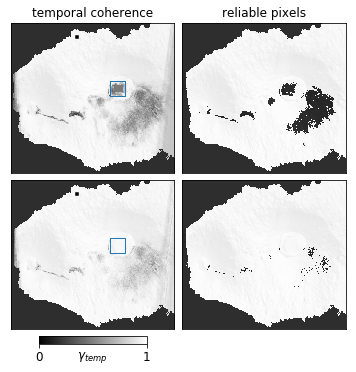

In [2]:
# plot
inps = pp.cmd_line_parse()
inps.disp_dem_contour = False

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[6, 7])
for i in range(len(tcoh)):
    pp.plot_dem_background(ax=ax[i, 0], geo_box=None, dem=dem, inps=inps, print_msg=False)
    pp.plot_dem_background(ax=ax[i, 1], geo_box=None, dem=dem, inps=inps, print_msg=False)
    im = ax[i, 0].imshow(tcoh[i],   vmin=0., vmax=1., cmap='gray', alpha=0.8)
    ax[i, 0].plot(ref_x, ref_y, 'ks', ms=3, mew=0.5)
    ax[i, 1].imshow(tcmask[i], vmin=0., vmax=1., cmap='gray', alpha=0.8)

x0, y0, x1, y1 = (582, 449, 674, 538)
pts_x = [x0, x1, x1, x0, x0]
pts_y = [y0, y0, y1, y1, y0]
ax[0, 0].plot(pts_x, pts_y, '-', lw=1)
ax[1, 0].plot(pts_x, pts_y, '-', lw=1)

num_list = ['(a)', '(b)', '(c)', '(d)']
ax_list = ax.flatten().tolist()
for i in range(len(ax_list)):
    axi = ax_list[i]
    pp.auto_flip_direction(metadata, ax=axi, print_msg=False)
    axi.get_xaxis().set_ticks([])
    axi.get_yaxis().set_ticks([])
fig.subplots_adjust(wspace=0.05, hspace=-0.3)

ax[0, 0].set_title('temporal coherence', fontsize=font_size)
ax[0, 1].set_title('reliable pixels', fontsize=font_size)

# colorbar
cax = fig.add_axes([0.19, 0.17, 0.25, 0.015])
cbar = plt.colorbar(im, cax=cax, ticks=[0, 1], orientation='horizontal')
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label(r'$\gamma_{temp}$', fontsize=font_size, labelpad=-14)

plt.savefig('{}_tempCoh_compare.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()

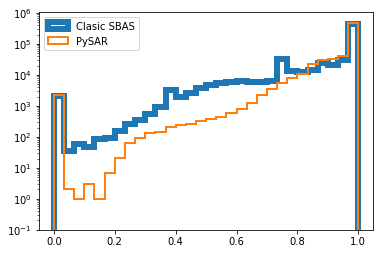

In [44]:
plt.figure()
plt.hist(tcoh[0][water_mask].flatten(), bins=30, log=True, histtype='step', lw=6, label='Clasic SBAS')
plt.hist(tcoh[1][water_mask].flatten(), bins=30, log=True, histtype='step', lw=2, label='PySAR')
plt.legend(loc='upper left')
plt.show()

In [3]:
metadata['REF_Y']

'801'